Importing Libraries

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
product_description = pd.read_csv('product_descriptions.csv')
product_description.shape

(124428, 2)

In [3]:
product_description = product_description.dropna()
product_description.shape
product_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [4]:
product_description1 = product_description.head(500)
product_description1["product_description"].head()

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
Name: product_description, dtype: object

In [5]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x1 = vectorizer.fit_transform(product_description1["product_description"])
x1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

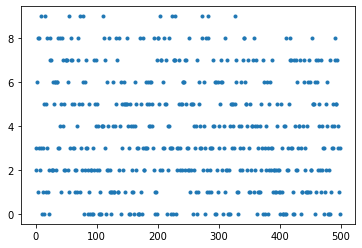

In [6]:
x=x1
kmeans = KMeans(n_clusters=10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [8]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 frame
 patio
 dining
 cushions
 water
 wicker
 collection
 color
 outdoor
 chairs
Cluster 1:
 air
 light
 fan
 control
 help
 depot
 ft
 use
 watt
 white
Cluster 2:
 power
 cutting
 volt
 20
 tool
 saw
 light
 battery
 watt
 work
Cluster 3:
 painted
 post
 ft
 primed
 used
 steel
 wood
 landscape
 project
 moulding
Cluster 4:
 lbs
 stake
 easy
 storage
 steel
 garden
 duty
 heavy
 unit
 construction
Cluster 5:
 water
 toilet
 piece
 design
 tile
 installation
 flush
 wall
 use
 warranty
Cluster 6:
 rug
 vary
 watering
 slightly
 dimensions
 100
 water
 stakes
 patterns
 ft
Cluster 7:
 paint
 trim
 roller
 azek
 single
 screw
 screws
 hole
 brush
 metal
Cluster 8:
 door
 easy
 provides
 use
 water
 proposition
 nbsp
 residents
 california
 65
Cluster 9:
 window
 natural
 bamboo
 insulation
 mount
 shades
 ft
 privacy
 style
 filter


C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
def show_recommendations(product):
    y = vectorizer.transform([product])
    prediction = model.predict(y)
    print_cluster(prediction[0])

In [10]:
show_recommendations('cutting toos')

Cluster 2:
 power
 cutting
 volt
 20
 tool
 saw
 light
 battery
 watt
 work


In [11]:
show_recommendations('spray paint')

Cluster 7:
 paint
 trim
 roller
 azek
 single
 screw
 screws
 hole
 brush
 metal
